In [36]:
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Create a path to the csv and read it into a Pandas DataFrame
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

print(city_df.head())
print(ride_df.head())

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


In [8]:
city_count = ride_df.groupby(['city'], as_index=False)['fare'].count()
print(city_count.head())
fare_sum = ride_df.groupby(['city'], as_index=False)['fare'].sum()
print(fare_sum.head())

            city  fare
0    Amandaburgh    18
1    Barajasview    22
2  Barronchester    16
3    Bethanyland    18
4   Bradshawfurt    10
            city    fare
0    Amandaburgh  443.55
1    Barajasview  557.31
2  Barronchester  582.76
3    Bethanyland  593.21
4   Bradshawfurt  400.64


In [13]:
temp_df= pd.merge(city_count, fare_sum, on="city")
temp_df = temp_df.rename(columns={'fare_x': 'Rides', 'fare_y': 'Total Cost'})
temp_df.head()

,city,Rides,Total Cost
0,Amandaburgh,18,443.55
1,Barajasview,22,557.31
2,Barronchester,16,582.76
3,Bethanyland,18,593.21
4,Bradshawfurt,10,400.64


In [16]:
temp_df['Avg Cost']=round(temp_df['Total Cost']/temp_df['Rides'],2)
temp_df.head()

,city,Rides,Total Cost,Avg Cost
0,Amandaburgh,18,443.55,24.64
1,Barajasview,22,557.31,25.33
2,Barronchester,16,582.76,36.42
3,Bethanyland,18,593.21,32.96
4,Bradshawfurt,10,400.64,40.06


In [95]:
final_df= pd.merge(city_df, temp_df, on='city')
final_df = final_df.rename(columns={'city': 'City', 'driver_count': 'Drivers', 'type': 'Type'})
recolor = {'Urban': 'lightcoral', 'Suburban': 'lightskyblue', 'Rural': 'gold'}
x = []
final_df['Color']=''
for i in range(0,len(final_df['City'])):
    x.append(recolor[final_df['Type'][i]])
final_df['Color'] = x
final_df.head()

,City,Drivers,Type,Rides,Total Cost,Avg Cost,Color
0,Richardfort,38,Urban,28,626.45,22.37,lightcoral
1,Williamsstad,59,Urban,23,560.33,24.36,lightcoral
2,Port Angela,67,Urban,19,452.90,23.84,lightcoral
3,Rodneyfort,34,Urban,23,658.19,28.62,lightcoral
4,West Robert,39,Urban,31,778.84,25.12,lightcoral


<function matplotlib.pyplot.show>

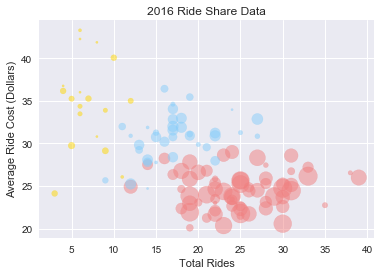

In [112]:
plt.title("2016 Ride Share Data")
plt.xlabel("Total Rides")
plt.ylabel("Average Ride Cost (Dollars)")
colors = ['gold', 'lightskyblue', 'lightcoral']
#sns.scatterplot(final_df['Rides'], final_df['Avg Cost'])
ax  = plt.scatter(final_df['Rides'], final_df['Avg Cost'],c=final_df['Color'], s=final_df['Drivers']*5,alpha=.5)
plt.show

In [55]:
bct = final_df.groupby(['Type'], as_index=False)['Total Cost'].sum()
#tfbct['Perc'] = 100*tfbct['Total Cost']/tfbct['Total Cost'].sum()
bct['Total Rides'] = final_df.groupby(['Type'], as_index=False)['Rides'].sum()['Rides']
bct['Total Drivers'] = final_df.groupby(['Type'], as_index=False)['Drivers'].sum()['Drivers']
print(bct)

       Type  Total Cost  Total Rides  Total Drivers
0     Rural     4327.93          125             78
1  Suburban    19356.33          625            490
2     Urban    39854.38         1625           2405


([<matplotlib.patches.Wedge at 0x25e36ecb828>,
 [Text(-0.233596,1.07491,'Rural'),
  Text(-1.08107,0.20317,'Suburban'),
  Text(1.01327,-0.428113,'Urban')],
 [Text(-0.127416,0.586315,'6.8%'),
  Text(-0.589677,0.11082,'30.5%'),
  Text(0.552694,-0.233516,'62.7%')])

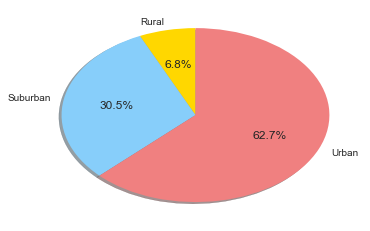

In [82]:
plt.pie(bct['Total Cost'], labels=bct['Type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x25e358f3c18>,
 [Text(-0.181054,1.085,'Rural'),
  Text(-1.00735,0.441865,'Suburban'),
  Text(0.920883,-0.601643,'Urban')],
 [Text(-0.0987568,0.591817,'5.3%'),
  Text(-0.549464,0.241017,'26.3%'),
  Text(0.5023,-0.328169,'68.4%')])

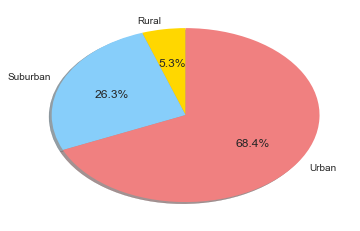

In [81]:
plt.pie(bct['Total Rides'], labels=bct['Type'], colors= colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x25e35c500b8>,
 [Text(-0.0905629,1.09627,'Rural'),
  Text(-0.693922,0.853506,'Suburban'),
  Text(0.621297,-0.907739,'Urban')],
 [Text(-0.049398,0.597963,'2.6%'),
  Text(-0.378503,0.465549,'16.5%'),
  Text(0.33889,-0.49513,'80.9%')])

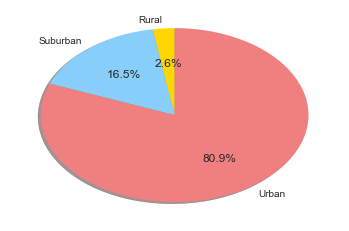

In [80]:
plt.pie(bct['Total Drivers'], labels=bct['Type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)